<a href="https://colab.research.google.com/github/amalvarezme/AprendizajeMaquina/blob/main/7_TopicosAvanzados/4_DKernelsEmbeddings/4_GPFlow_GaussianProcess.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Procesos Gaussianos y TensorFlow



## Gaussian Process Regressor (GPR)

Un Gaussian Process Regressor (GPR), o regresor basado en procesos Gaussianos, es un método de aprendizaje no paramétrico utilizado para problemas de regresión. A continuación, se presentan los conceptos principales y la matemática fundamental de un GPR:

### Proceso Gaussiano (GP)

- Un Proceso Gaussiano es una generalización de la distribución normal multivariada a dimensiones infinitas.
- En el contexto de la regresión, un GP es un conjunto de variables aleatorias, cualquier subconjunto de las cuales tiene una distribución normal multivariada.
- Un proceso Gaussiano está completamente definido por su función de media $ m(\mathbf{x})$ y su función de covarianza o kernel $k(\mathbf{x}, \mathbf{x}')$:

$
f(\mathbf{x}) \sim \mathscr{GP}(m(\mathbf{x}), k(\mathbf{x}, \mathbf{x}'))
$

donde:

- $m(\mathbf{x}) = \mathbb{E}[f(\mathbf{x})]$ es la media.
- $k(\mathbf{x}, \mathbf{x}') = \mathbb{E}[(f(\mathbf{x}) - m(\mathbf{x}))(f(\mathbf{x}') - m(\mathbf{x}'))]$ es la covarianza o kernel.


### Función de Media y Función de Covarianza

- Función de Media  $m(\mathbf{x})$: Para simplificar, generalmente se asume que la función de media es cero, $ m(\mathbf{x}) = 0 $, aunque se pueden incorporar términos más complejos.

- Función de Covarianza $k(\mathbf{x}, \mathbf{x}')$: Define la similitud entre diferentes puntos de datos. Un kernel comúnmente usado es el kernel RBF (Radial Basis Function) o kernel Gaussiano, definido como:

$k(\mathbf{x}, \mathbf{x}') = \sigma_f^2 \exp\left(-\frac{||\mathbf{x} - \mathbf{x}'||^2}{2l^2}\right)$

donde $\sigma_f^2$ es la varianza y $ l $ es el parámetro de longitud que controla la suavidad de las funciones generadas por el GP.

### Inferencia y Predicción

Dado un conjunto de datos de entrenamiento $ \mathbf{X} = \{\mathbf{x}_1, \mathbf{x}_2, \ldots, \mathbf{x}_n\} $ y sus correspondientes observaciones $ \mathbf{y} = \{y_1, y_2, \ldots, y_n\} $, queremos predecir la salida $ y_* $ para un nuevo punto de entrada $\mathbf{x}_* $.

### Distribución Conjunta

Se asume que los valores de las observaciones $\mathbf{y}$ y el valor predicho $y_*$ siguen una distribución normal conjunta:

\begin{equation}
\begin{bmatrix}
\mathbf{y} \\
y_*
\end{bmatrix}
\sim \mathscr{N}\left(
\begin{bmatrix}
\mathbf{0} \\
0
\end{bmatrix},
\begin{bmatrix}
K(\mathbf{X}, \mathbf{X}) + \sigma_n^2 I & K(\mathbf{X}, \mathbf{x}_*) \\
K(\mathbf{x}_*, \mathbf{X}) & K(\mathbf{x}_*, \mathbf{x}_*)
\end{bmatrix}
\right)
\end{equation}

donde:


- $ K(\mathbf{X}, \mathbf{X})$ es la matriz de covarianza entre los puntos de entrenamiento.
- $ K(\mathbf{X}, \mathbf{x}_*) $ es el vector de covarianza entre los puntos de entrenamiento y el nuevo punto.
- $\sigma_n^2$ es la varianza del ruido.


### Predicción de la Media y la Varianza

Condicionando en los datos observados, la distribución predictiva para $y_*$ es:


$y_* | \mathbf{X}, \mathbf{y}, \mathbf{x}_* \sim \mathscr{N}(\mu_*, \sigma_*^2)$

donde:

### Media Predictiva

$\mu_* = K(\mathbf{x}_*, \mathbf{X}) [K(\mathbf{X}, \mathbf{X}) + \sigma_n^2 I]^{-1} \mathbf{y}$
    
    
### Varianza Predictiva
  
  $\sigma_*^2 = K(\mathbf{x}_*, \mathbf{x}_*) - K(\mathbf{x}_*, \mathbf{X}) [K(\mathbf{X}, \mathbf{X}) + \sigma_n^2 I]^{-1} K(\mathbf{X}, \mathbf{x}_*)$

### Ventajas y Desventajas de GPR

Ventajas:

- Ofrece predicciones probabilísticas (incertidumbre en las predicciones).
- Es flexible y puede modelar funciones complejas.
- No requiere suposiciones específicas sobre la forma de la función de mapeo entre entradas y salidas.


Desventajas:

- Escalabilidad limitada a conjuntos de datos grandes debido a la inversión de matrices ($O(n^3)$ para $n$ puntos de datos).
- La elección del kernel y sus hiperparámetros puede ser crucial para un buen rendimiento.





# Gaussian Process Classification (GPC)

- Para extender el Gaussian Process Regressor (GPR) a un problema de clasificación, utilizamos un enfoque conocido como Gaussian Process Classification (GPC).

- A diferencia de la regresión, donde el objetivo es predecir un valor continuo, en la clasificación se busca predecir una etiqueta discreta (por ejemplo, clases 0 y 1).

### Modelo Latente

- En el GPC, en lugar de modelar la salida  $y$ directamente, modelamos una función latente  $f(\mathbf{x})$ con un proceso Gaussiano y luego pasamos esta función a través de una función sigmoide para obtener probabilidades de clase.

- Para un problema de clasificación binaria:


$f(\mathbf{x}) \sim \mathscr{GP}(m(\mathbf{x}), k(\mathbf{x}, \mathbf{x}')),$

donde, como en el caso de la regresión, $m(\mathbf{x})$ es la función de media (generalmente asumida como cero) y $k(\mathbf{x}, \mathbf{x}')$ es la función de covarianza o kernel.

### Función de Enlace Sigmoide

- Para convertir la función latente $f(\mathbf{x})$ en probabilidades, se utiliza una función de enlace sigmoide, como la función logística:


$\sigma(f) = \frac{1}{1 + e^{-f}}$.

- La probabilidad de pertenecer a la clase 1 dada la función latente $f(\mathbf{x})$ es:


$p(y = 1 \mid f(\mathbf{x})) = \sigma(f(\mathbf{x}))$.

### Inferencia y Predicción

Dado un conjunto de datos de entrenamiento $ \mathbf{X} = \{\mathbf{x}_1, \mathbf{x}_2, \ldots, \mathbf{x}_n\}$ y sus correspondientes etiquetas $\mathbf{y} = \{y_1, y_2, \ldots, y_n\} $, queremos predecir la probabilidad de que una nueva entrada $\mathbf{x}_*$ pertenezca a la clase 1.

### Distribución Conjunta

- La inferencia en GPC es más compleja que en el caso de regresión debido a la naturaleza no lineal de la función de enlace sigmoide. La distribución conjunta de $ \mathbf{f} = \{f(\mathbf{x}_1), \ldots, f(\mathbf{x}_n)\} $ es Gaussiana:

$
\mathbf{f} \sim \mathscr{N}(\mathbf{0}, K(\mathbf{X}, \mathbf{X})),
$

donde $ K(\mathbf{X}, \mathbf{X}) $ es la matriz de covarianza calculada usando el kernel.

### Distribución Posterior

- La distribución posterior de $\mathbf{f} $ dada las observaciones $ \mathbf{y}$ se define como:

$
p(\mathbf{f} \mid \mathbf{X}, \mathbf{y}) = \frac{p(\mathbf{y} \mid \mathbf{f}) p(\mathbf{f} \mid \mathbf{X})}{p(\mathbf{y} \mid \mathbf{X})}.
$

- Dado que la función de enlace sigmoide introduce una no linealidad, $ p(\mathbf{y} \mid \mathbf{f}) $ no es una Gaussiana, lo que hace que la posterior no sea analíticamente tractable.

### Métodos de Aproximación

Para realizar la inferencia, se utilizan métodos de aproximación como:


- Laplace Approximation: Aproxima el posterior como una Gaussiana centrada en el modo de la distribución posterior.
- Expectation Propagation (EP): Una aproximación iterativa que busca minimizar la divergencia de Kullback-Leibler entre la distribución aproximada y la verdadera posterior.
- Variational Inference: Maximiza una cota inferior de la evidencia del modelo para obtener una aproximación Gaussiana de la posterior.


### Ejercicio

Mediante un ejemplo ilustrativo, describa las diferencias conceptuales y matemáticas de los tres métodos de aproximación descritos anteriormente.

### Predicción

- Para una nueva entrada $\mathbf{x}_* $, la predicción se basa en la probabilidad posterior:


$p(y_* = 1 \mid \mathbf{x}_*, \mathbf{X}, \mathbf{y}) = \int \sigma(f_*) p(f_* \mid \mathbf{x}_*, \mathbf{X}, \mathbf{y}) df_*$.

- Este integral se puede resolver analíticamente para algunas aproximaciones, pero generalmente requiere métodos numéricos.

### Ventajas y Desventajas del GPC

Ventajas:

- Proporciona predicciones probabilísticas con estimaciones de incertidumbre.
- Flexible para modelar funciones complejas y no lineales.
- No requiere suposiciones específicas sobre la forma de la función de mapeo.


Desventajas:

- La inferencia es más compleja y computacionalmente costosa que en la regresión.
- Escalabilidad limitada a conjuntos de datos grandes debido a la inversión de matrices ($O(n^3)$ para $n$ puntos de datos).
- La elección del kernel y sus hiperparámetros es crucial para un buen rendimiento.


# GP con tensores : [GPFlow](https://gpflow.github.io/GPflow/2.9.1/index.html)


###vGaussian Process Regression (GPR) con GPflow

En la GPR, modelamos la función subyacente $f(\mathbf{x})$ que genera los datos observados como un proceso Gaussiano. Esto significa que cualquier conjunto finito de puntos de la función tiene una distribución conjunta Gaussiana.

### Implementación de GPR con GPflow

GPflow es una biblioteca basada en TensorFlow diseñada para construir y entrenar modelos de procesos Gaussianos. Permite implementar de manera eficiente modelos de GPR utilizando optimización de máxima verosimilitud marginal (MLE) u otros métodos de optimización.

### Creación del Modelo en GPflow

En GPflow, un modelo GPR se construye especificando un kernel y los datos de entrenamiento. A continuación, se presenta un ejemplo básico de cómo crear un modelo GPR en GPflow:



In [ ]:
!pip install gpflow --upgrade #tensorflow~=2.12.0 tensorflow-probability~=0.20.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 392.9/392.9 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.8/45.8 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.0/111.0 kB 6.2 MB/s eta 0:00:00


In [ ]:
import tensorflow
import gpflow
import numpy as np

In [ ]:
print(tensorflow.__version__)
print(gpflow.__version__)

2.17.0
2.9.2


In [ ]:

# Datos de entrenamiento
X = np.random.rand(100, 1)  # Características
Y = np.sin(12 * X) + 0.66 * np.cos(25 * X) + 0.1 * np.random.randn(100, 1)  # Observaciones con ruido

# Kernel RBF
kernel = gpflow.kernels.SquaredExponential()

# Modelo GPR
model = gpflow.models.GPR(data=(X, Y), kernel=kernel)
print('kernel hyperparameter initial point\n',model.kernel.lengthscales)

kernel hyperparameter initial point
 <Parameter: name=softplus, dtype=float64, shape=[], fn="softplus", numpy=1.0>


### Optimización del Modelo

Una vez creado el modelo, se puede optimizar usando un optimizador de GPflow. Generalmente, se utiliza el método de máxima verosimilitud marginal (MLE) para ajustar los parámetros del kernel y los hiperparámetros del modelo.


In [ ]:
# Optimización del modelo
opt = gpflow.optimizers.Scipy()
opt.minimize(model.training_loss, model.trainable_variables)

  message: CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH
  success: True
   status: 0
      fun: -61.27879950578915
        x: [-2.489e+00  3.843e-01 -4.932e+00]
      nit: 28
      jac: [ 6.790e-04 -1.638e-04 -8.372e-05]
     nfev: 62
     njev: 62
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>

### Predicción con GPflow

- Después de entrenar el modelo, se pueden realizar predicciones para nuevos datos utilizando el modelo ajustado.
- GPflow proporciona métodos para obtener tanto la media predictiva como la varianza, lo cual es útil para estimar la incertidumbre en las predicciones.



In [ ]:
# Nuevos datos para predicción
Xnew = np.linspace(0, 1, 100).reshape(-1, 1)

# Predicción usando el modelo GPR
f_mean, f_var = model.predict_f(Xnew, full_cov=False)
y_mean, y_var = model.predict_y(Xnew)

### Graficar predictiva

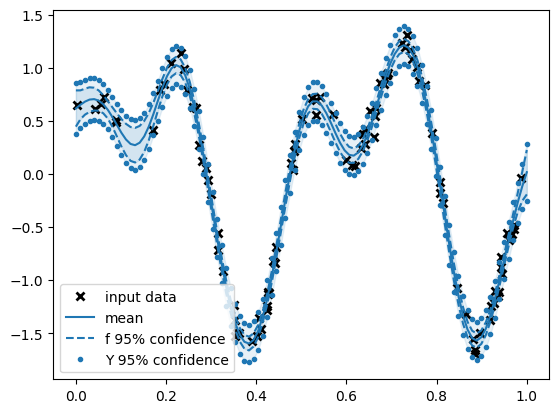

In [ ]:
import matplotlib.pyplot as plt

f_lower = f_mean - 1.96 * np.sqrt(f_var)
f_upper = f_mean + 1.96 * np.sqrt(f_var)
y_lower = y_mean - 1.96 * np.sqrt(y_var)
y_upper = y_mean + 1.96 * np.sqrt(y_var)

plt.plot(X, Y, "kx", mew=2, label="input data")
plt.plot(Xnew, f_mean, "-", color="C0", label="mean")
plt.plot(Xnew, f_lower, "--", color="C0", label="f 95% confidence")
plt.plot(Xnew, f_upper, "--", color="C0")
plt.fill_between(
    Xnew[:, 0], f_lower[:, 0], f_upper[:, 0], color="C0", alpha=0.1
)
plt.plot(Xnew, y_lower, ".", color="C0", label="Y 95% confidence")
plt.plot(Xnew, y_upper, ".", color="C0")
plt.fill_between(
    Xnew[:, 0], y_lower[:, 0], y_upper[:, 0], color="C0", alpha=0.1
)
plt.legend()

In [ ]:
print('kernel hyperparameter trained\n',model.kernel.lengthscales)

kernel hyperparameter trained
 <Parameter: name=softplus, dtype=float64, shape=[], fn="softplus", numpy=0.07970118806367882>



### Ventajas y Desventajas del GPR con GPflow

Ventajas:

  - Predicciones probabilísticas: GPflow facilita la obtención de predicciones probabilísticas con incertidumbres, lo que es útil para evaluar la confiabilidad de las predicciones.
  - Flexibilidad y eficiencia: La integración con TensorFlow permite aprovechar técnicas de optimización avanzadas y hardware acelerado, como GPUs.
  - Fácil de usar: GPflow tiene una API amigable que simplifica la creación y entrenamiento de modelos de procesos Gaussianos.


Desventajas:

- Escalabilidad limitada: A pesar de las optimizaciones, los modelos de GPR siguen siendo computacionalmente costosos para grandes conjuntos de datos debido a la inversión de matrices.
- Ajuste de hiperparámetros: La selección del kernel adecuado y el ajuste de hiperparámetros son cruciales y pueden requerir experiencia y ajuste manual.


## Ejercicio

- Describa el modelo y la optimización de los GPR, GPC, VGP, SGPR, y SVGP.

- Discuta los métodos de optimización que utiliza GPFlow con scipy y TensorFlow.

- Implemente un clasificador multiclase, para la base de datos fashionMnist, utilizando un Sparse GP implementado con GPflow y optimizador de TensorFlow. (ver [https://gpflow.github.io/GPflow/develop/getting_started.html](https://gpflow.github.io/GPflow/develop/getting_started.html))

- Discuta las ventajas y desventajas de un clasificador tipo autoencoder variacional vs un modelo basado en GP y GPflow.